### Imports

In [141]:
import cvxopt as cv
import numpy as np
import matplotlib.pyplot as plt

### Initialize and visualize data

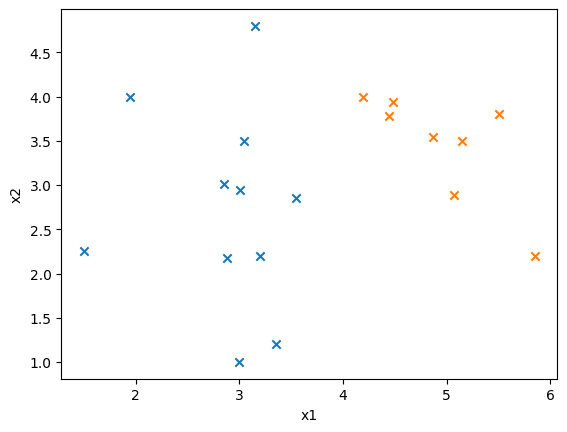

In [142]:
def make_linear():
    X = np.asarray([
        [3.00, 1.00], [3.20, 2.20], [3.15, 4.80],
        [3.35, 1.20], [3.05, 3.50], [3.55, 2.85],
        [1.50, 2.25], [2.88, 2.18], [1.95, 4.00],
        [3.01, 2.95], [2.85, 3.01], [5.85, 2.20],
        [4.19, 4.00], [5.15, 3.50], [5.07, 2.89],
        [4.87, 3.54], [4.44, 3.78], [4.48, 3.94],
        [5.51, 3.80]
    ])

    y = np.asarray([
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
         1,  1,  1,  1,  1,  1,  1
    ])

    return X, y

X, y = make_linear()

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='x', label='Klasse -1')
plt.scatter(X[y ==  1, 0], X[y ==  1, 1], marker='x', label='Klasse 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Setting up variables

In [143]:
n = X.shape[0]
P = cv.matrix([[y[i] * y[j] * np.dot(X[i], X[j]) for i in range(n)] for j in range(n)])
q = cv.matrix(np.ones(n))
G = cv.matrix(-np.eye(n))
h = cv.matrix(np.zeros(n))
A = cv.matrix(y, (1, n), "d")
b = cv.matrix(0.0)

### Optimization

In [144]:
sol = cv.solvers.qp(P, q, G, h, A, b)
alphas = np.squeeze(np.array(sol["x"]))
print(alphas)

     pcost       dcost       gap    pres   dres
 0: -3.7710e+00  7.1506e+00  6e+01  8e+00  2e+00
 1:  8.6006e-01 -3.7810e-01  1e+01  2e+00  4e-01
 2:  5.9307e-01 -1.3133e-01  7e-01  2e-16  3e-15
 3:  5.7323e-02 -3.0803e-03  6e-02  1e-17  1e-15
 4:  1.3901e-03 -2.6437e-06  1e-03  2e-18  4e-16
 5:  1.3919e-05 -2.6628e-10  1e-05  6e-20  4e-16
 6:  1.3919e-07 -2.6628e-14  1e-07  1e-21  5e-16
 7:  1.3919e-09 -2.6628e-18  1e-09  2e-23  3e-16
Optimal solution found.
[2.62533913e-11 2.55367852e-11 4.58645434e-12 2.84262320e-11
 1.84372260e-11 1.03073256e-11 4.88683093e-10 3.04242466e-11
 1.01288679e-11 2.47378078e-11 2.84225104e-11 1.08311053e-10
 4.54456369e-11 1.07595435e-10 9.03297815e-11 9.04265709e-11
 6.03828534e-11 6.83346390e-11 1.25117971e-10]


### SVM 

In [145]:
w = np.sum((alphas*y)[:, None] * X, axis=0)
S = np.where(alphas > 1e-10)[0]

b_sum = 0

for i in S:
    inner = np.sum(alphas[S] * y[S] * np.dot(X[i], X[S].T))
    b_sum += y[i] - inner
b = b_sum / len(S)

print(w, b)

[2.18130147e-09 7.53375444e-10] 0.49999999487572255


### Plot the result